#### Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings("ignore")

#### Data Collection and Analysis

In [3]:
# loading dataset into pandas dataframe
cancer_data = pd.read_csv('./breast_cancer_data.csv')

In [4]:
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
cancer_data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [6]:
cancer_data.shape

(569, 33)

In [7]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
cancer_data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
cancer_data = cancer_data.drop(columns=['id', 'Unnamed: 32'], axis=1)

In [10]:
cancer_data['diagnosis'].value_counts()


B    357
M    212
Name: diagnosis, dtype: int64

In [11]:
cancer_data =cancer_data.replace({'diagnosis': {'M': 0, 'B': 1}})

In [12]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

#### Data Visualization

In [13]:
correlation = cancer_data.corr()

<AxesSubplot: >

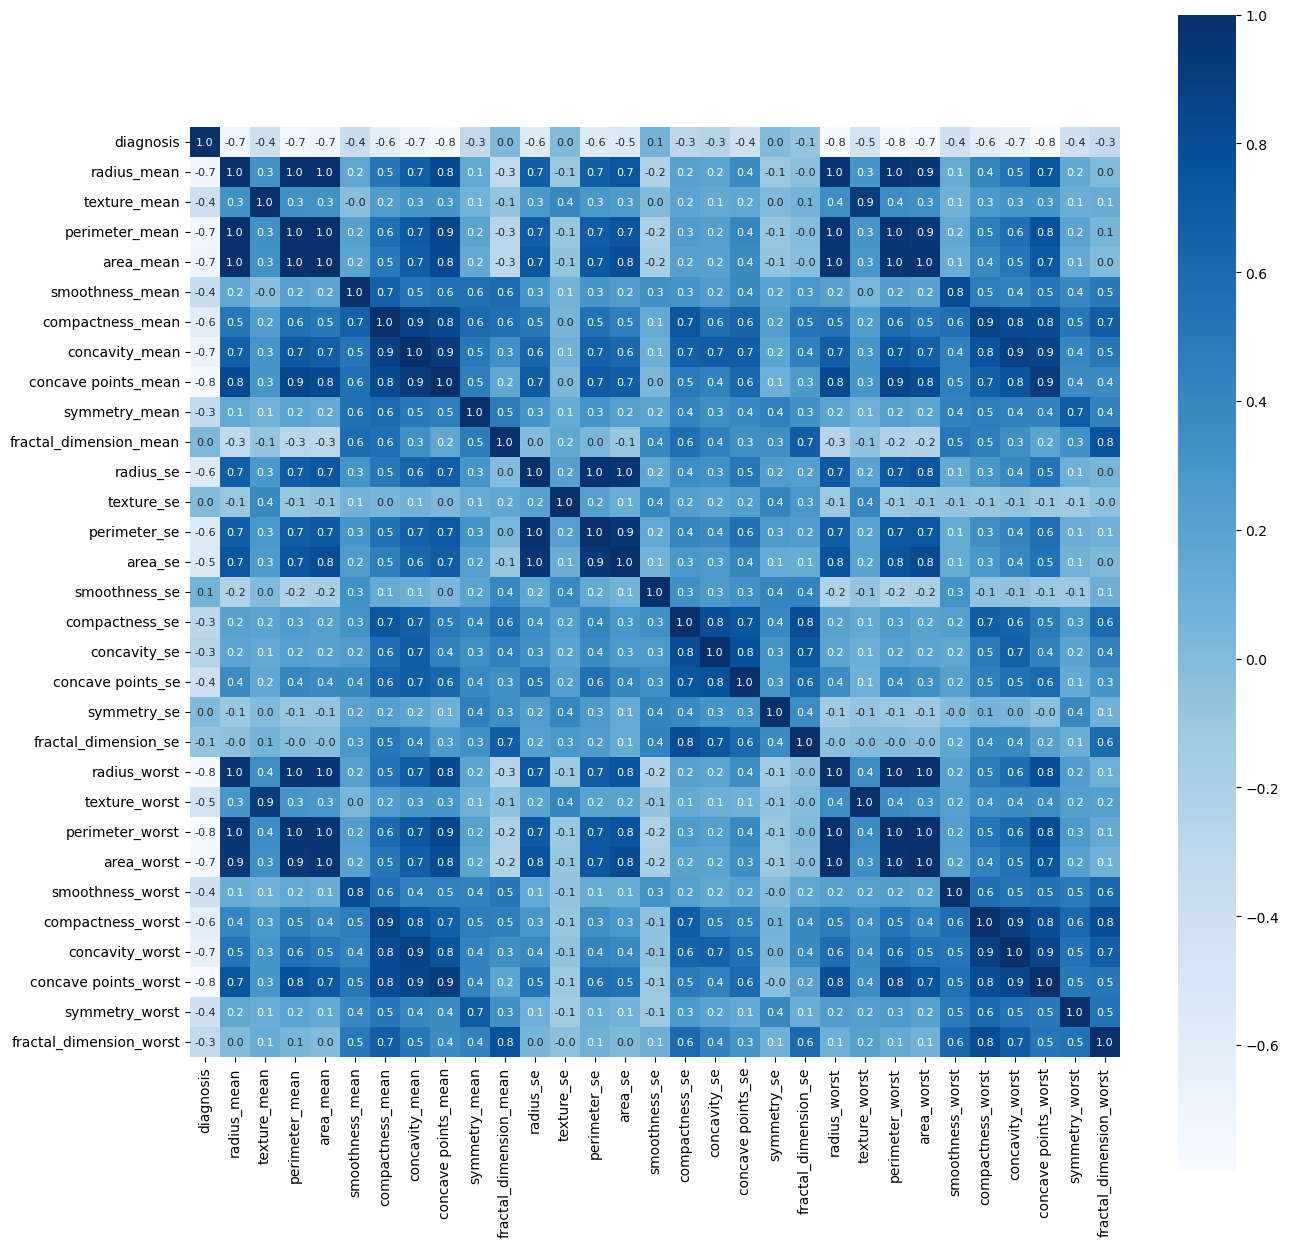

In [14]:
plt.figure(figsize=(15, 15))
sns.heatmap(correlation, cbar=True, fmt="0.1f", square=True, annot=True, annot_kws={'size': 8}, cmap='Blues')

#### Splitting data into Features and Target

In [15]:
X = cancer_data.drop(columns="diagnosis", axis=1)
Y = cancer_data['diagnosis']

In [16]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [17]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

#### Splitting data into Train and Test data

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [19]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


#### Standardize the data

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scalar = StandardScaler()

X_train_std = scalar.fit_transform(X_train)
X_test_std = scalar.transform(X_test)

#### Building Neural Network

In [22]:
tf.random.set_seed(3)

In [23]:
model = keras.Sequential([
                        keras.layers.Flatten(input_shape=(30,1)),
                        keras.layers.Dense(16, activation='relu'), # hidden layer 1
                        keras.layers.Dense(32, activation='relu'), # hidden layer 2
                        keras.layers.Dense(64, activation='relu'), # hidden layer 3
                        keras.layers.Dense(128, activation='relu'), # hidden layer 4
                        keras.layers.Dense(64, activation='relu'), # hidden layer 5
                        keras.layers.Dense(32, activation='relu'), # hidden layer 6
                        keras.layers.Dense(2, activation='softmax')
])

In [24]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [25]:
# training the neural network
history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=20)

Epoch 1/20
13/13 [==============================] - 1s 12ms/step - loss: 0.5683 - accuracy: 0.7971 - val_loss: 0.3206 - val_accuracy: 0.9130
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.2763 - accuracy: 0.9095 - val_loss: 0.1300 - val_accuracy: 0.9348
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1828 - accuracy: 0.9315 - val_loss: 0.0821 - val_accuracy: 0.9565
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1476 - accuracy: 0.9413 - val_loss: 0.0752 - val_accuracy: 0.9565
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1217 - accuracy: 0.9633 - val_loss: 0.0645 - val_accuracy: 0.9565
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1042 - accuracy: 0.9658 - val_loss: 0.0537 - val_accuracy: 0.9783
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1021 - accuracy: 0.9658 - val_loss: 0.0407 - val_accuracy: 0.9783
Epoch 8/20
13/13 [=

#### Visualizing Accuracy and Loss

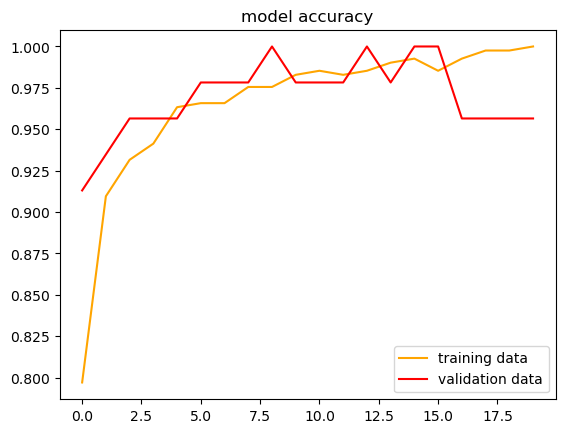

In [26]:
plt.plot(history.history['accuracy'], color="orange")
plt.plot(history.history['val_accuracy'], color="red")
plt.title("model accuracy")
plt.legend(['training data', 'validation data'], loc = 'lower right')
plt.show()

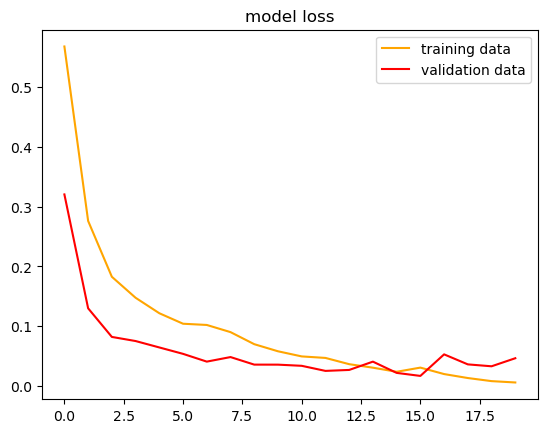

In [27]:
plt.plot(history.history['loss'], color="orange")
plt.plot(history.history['val_loss'], color="red")
plt.title("model loss")
plt.legend(['training data', 'validation data'], loc = 'upper right')
plt.show()

#### Accuracy on Test data

In [28]:
# similar to model.predict and accuracy_score in machine learning
loss, accuracy = model.evaluate(X_test_std, Y_test)
print(accuracy)

4/4 [==============================] - 0s 1ms/step - loss: 0.1262 - accuracy: 0.9561
0.9561403393745422


In [29]:
Y_pred = model.predict(X_test_std)

4/4 [==============================] - 0s 1000us/step


In [30]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 30)
[ 0.44199702  0.212229    0.42163229  0.28029849  0.46059068  0.31923771
  0.32738868  0.3980721   0.45467963  0.05268291 -0.22649032 -0.56019683
 -0.32014237 -0.19125366 -0.76043663 -0.08046584 -0.26006979 -0.51214349
 -0.33901861 -0.23280218  0.65164049  0.74215747  0.53471259  0.33156671
  1.02726691  1.30534397  0.62768506  0.50566574  1.76577066  1.29575996]


In [31]:
print(Y_pred.shape)
print(Y_pred[0])

(114, 2)
[9.9998820e-01 1.1821069e-05]


In [32]:
print(Y_pred)

[[9.99988198e-01 1.18210692e-05]
 [4.51668313e-07 9.99999523e-01]
 [2.14385116e-04 9.99785602e-01]
 [9.72548060e-06 9.99990225e-01]
 [8.91038653e-05 9.99910831e-01]
 [5.52474696e-04 9.99447525e-01]
 [1.97175177e-06 9.99997973e-01]
 [6.60286634e-04 9.99339640e-01]
 [1.02087906e-04 9.99897957e-01]
 [2.41676867e-06 9.99997616e-01]
 [9.99998808e-01 1.15070168e-06]
 [9.99999046e-01 1.01256273e-06]
 [2.24524683e-06 9.99997735e-01]
 [8.59059334e-01 1.40940696e-01]
 [1.00000000e+00 4.91317785e-11]
 [1.34371268e-02 9.86562848e-01]
 [3.54712739e-07 9.99999642e-01]
 [3.25361020e-06 9.99996781e-01]
 [1.73691777e-03 9.98263061e-01]
 [7.10339006e-03 9.92896616e-01]
 [4.57089692e-02 9.54290986e-01]
 [1.00000000e+00 1.04256390e-08]
 [1.00000000e+00 5.42555068e-09]
 [3.75016369e-02 9.62498307e-01]
 [1.96647621e-03 9.98033583e-01]
 [1.18544017e-06 9.99998808e-01]
 [9.99961376e-01 3.86780703e-05]
 [9.99999762e-01 2.97960923e-07]
 [8.95188451e-01 1.04811475e-01]
 [1.39619206e-05 9.99986053e-01]
 [2.581195

In [33]:
# converting the prediction probability to class labels
y_pred_labels = [np.argmax(i) for i in Y_pred]

In [34]:
print(y_pred_labels)

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1]


#### Building the Predictive System

In [35]:
input_data = (20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902)
arr = np.asarray(input_data)
# print(arr)
arr_reshape = arr.reshape(1, -1)
# print(arr_reshape)
arr_reshape_std = scalar.transform(arr_reshape)
# print(arr_reshape_std)
predict = model.predict(arr_reshape_std)
print(predict)

predict_lab = [np.argmax(predict)]
print(predict_lab)

if predict_lab[0] == 0:
    print("Tumor is Malignant")
else:
    print("Tumor is Benign")

1/1 [==============================] - 0s 14ms/step
[[1.000000e+00 7.590335e-09]]
[0]
Tumor is Malignant
